In [1]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import set_config

In [ ]:

# Data attributes

"""

"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday
"isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
2 = scattered clouds / few clouds 
3 = Broken clouds 
4 = Cloudy 
7 = Rain/ light Rain shower/ Light rain 
10 = rain with thunderstorm 
26 = snowfall 
94 = Freezing Fog

"""

In [2]:
# read data
data = pd.read_csv(r'data\london_merged.csv')
data.sample(5)

NameError: name 'pd' is not defined

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
 10  year          17414 non-null  object 
 11  month         17414 non-null  object 
 12  hour          17414 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.7+ MB


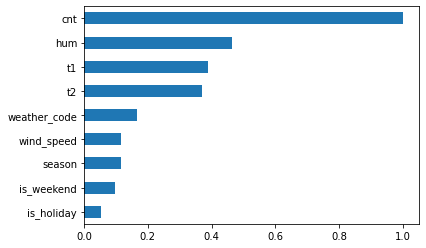

In [18]:
# correlation
data.corr()["cnt"].abs().sort_values().plot.barh()
plt.show()

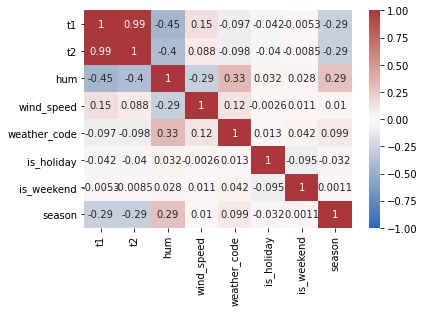

In [14]:
# check correlation matrix
matrix = data.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# Correlation between t1 and t2 is 0.99. We'll keep t1 since it seems to have a slightly better correlation to cnt.

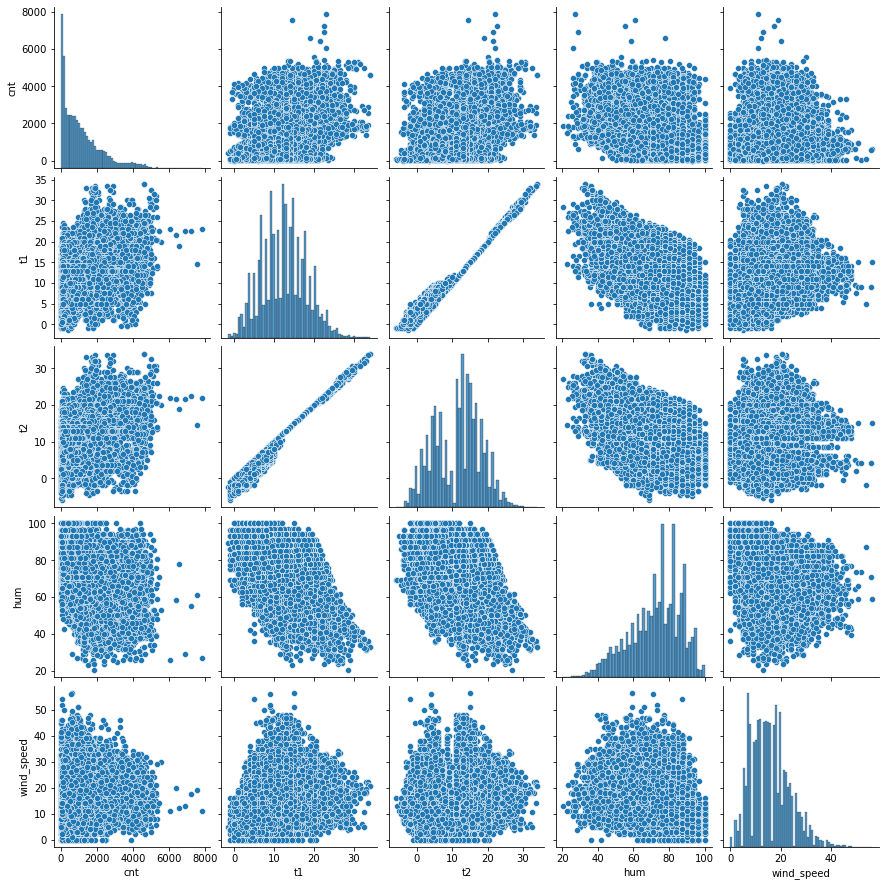

In [64]:
sns.pairplot(data.loc[:, 'cnt':'wind_speed'])
# t1 and t2 seems to be highly correlated...one of them must be dropped!

In [1]:
# How many samples make up discrete variable category?
for col in data.loc[:, 'weather_code':'season'].columns:
    var = data.loc[:, 'weather_code':'season'][col]
    sns.countplot(x=var)
    plt.show()

NameError: name 'data' is not defined

In [13]:
# clean data
target = data['cnt']
print(target.shape)

# axis = 1 is column
data = data.drop(['cnt'], axis = 1)
print(data.shape)

(17414,)
(17414, 9)


In [25]:
# [:4] used to print year (with fully, if you change it will print half)
# it print because it given in first
data['year'] = data['timestamp'].apply(lambda row: row[:4])
data['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
17409    2017
17410    2017
17411    2017
17412    2017
17413    2017
Name: year, Length: 17414, dtype: object

In [48]:
data['timestamp'].str.split('-')[0][-1][:2]

'04'

In [49]:
# [-1] is index, [:2] is value or total number we want to print
data['month'] = data['timestamp'].apply(lambda row: row.split('-')[1][:2] )
data['month']

0        01
1        01
2        01
3        01
4        01
         ..
17409    01
17410    01
17411    01
17412    01
17413    01
Name: month, Length: 17414, dtype: object

In [59]:
data['timestamp'].str.split(':')[0][-3]

'2015-01-04 00'

In [60]:
# [-2:] is giving least beginning values
data['hour'] = data['timestamp'].apply(lambda row: row.split(':')[-3][-2:] )
data['hour']

0        2015-01-04 
1        2015-01-04 
2        2015-01-04 
3        2015-01-04 
4        2015-01-04 
            ...     
17409    2017-01-03 
17410    2017-01-03 
17411    2017-01-03 
17412    2017-01-03 
17413    2017-01-03 
Name: hour, Length: 17414, dtype: object